In [1]:
import os
import jieba
import jieba.analyse
import matplotlib.pyplot as plt
import re
from zhon.hanzi import punctuation
from zhon.hanzi import non_stops
from zhon.hanzi import stops
from wordcloud import WordCloud, ImageColorGenerator
from scipy.misc import imread
from snownlp import SnowNLP

In [2]:
file_path = './Data'
tmp_comments = []
data_files = os.listdir(file_path)
for file in data_files:
    data_file = os.path.join('%s/%s' % (file_path, file))
    f = open(data_file, 'r', encoding='utf-8')
    while True:
        line = f.readline().strip()
        if not line or line=='':
            break
        tmp_comments += line.split(' ')

In [3]:
stopwords = [line.strip() for line in open('./config/common_stopwords.txt',encoding='UTF-8').readlines()]
        
comments = []
count = 0
words = ''
for i in range(len(tmp_comments)):
    tmp_words = list(jieba.cut(tmp_comments[i]))
    for tmp_word in tmp_words:
        if tmp_word not in stopwords:
            words = words + ' '+tmp_word
    tmp_comments[i] = re.sub(r'[%s]+'%punctuation, '', tmp_comments[i])
    tmp_comments[i] = re.sub(r'[%s]+'%non_stops, '', tmp_comments[i])
    tmp_comments[i] = re.sub(r'[%s]+'%non_stops, '', tmp_comments[i])
    if (len(tmp_comments[i])<3) or ('图片评论' in tmp_comments[i]) or ('评论配图' in tmp_comments[i]):
        continue
    comments.append(tmp_comments[i])

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Ricy\AppData\Local\Temp\jieba.cache
Loading model cost 0.753 seconds.
Prefix dict has been built succesfully.


## 利用词频生成词云

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


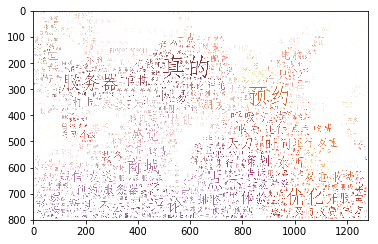

In [4]:
back_color = imread('./config/backgroud.jpg')
wc = WordCloud(background_color='white',  # 背景颜色
               max_words=1000,  # 最大词数
               mask = back_color,
               max_font_size=100,  # 显示字体的最大值
               font_path="C:/Windows/Fonts/STFANGSO.ttf",  # 解决显示口字型乱码问题，可进入C:/Windows/Fonts/目录更换字体
               random_state=42,  # 为每个词返回一个PIL颜色
#                width=1000,  # 图片的宽
#                height=850  #图片的长
               )
image_colors = ImageColorGenerator(back_color)
wc.generate(words)
plt.imshow(wc.recolor(color_func=image_colors))
wc.to_file("word_cloud_frequency.jpg")

## 通过textrank算法抽取关键词

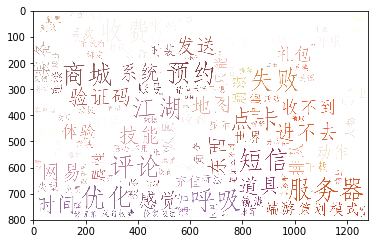

In [5]:
jieba.analyse.set_stop_words("./config/common_stopwords.txt")
key_words = jieba.analyse.textrank(words, topK=150, withWeight=False, allowPOS=('ns', 'n', 'vn', 'v'))
weight = 15000
step = 100
key_dict = {}
for key_word in key_words:
    key_dict[key_word] = weight
    weight -= step
wc.generate_from_frequencies(key_dict)
plt.imshow(wc.recolor(color_func=image_colors))
wc.to_file("word_cloud_keyword.jpg")

## 正负面评论计数

In [6]:
positive_count = 0
negative_count = 0
for comment in comments:
    s = SnowNLP(comment)
    if s.sentiments > 0.5:
        positive_count += 1
    else:
        negative_count += 1
print('positive_count: ', positive_count)
print('negative_count: ', negative_count)

positive_count:  3852
negative_count:  5558
